In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from cpp_soft_info import get_KDEs
from Scratch import load_calibration_memory
from result_saver import SaverProvider

provider = SaverProvider()
all_memories = load_calibration_memory(provider, tobecalib_backend='ibm_sherbrooke', other_date='2021-10-30')

import pickle 
with open('all_memories.pkl', 'wb') as f:
    pickle.dump(all_memories, f)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.


In [3]:
import pickle
from cpp_soft_info import get_KDEs

with open('all_memories.pkl', 'rb') as f:
    all_memories = pickle.load(f)

bandwiths = [0.6]*127
kde_dict = get_KDEs(all_memories, bandwiths, relError=1, absError=-1)

In [4]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 51
num_std = 3

grid_dict = generate_grid_and_estimate_density(kde_dict, num_points, num_std)
# grid_dict

Grid generation time: 1.8792e-05 seconds
KDE initialization time for qubit 0: 4.542e-06 seconds
KDE evaluation time for qubit 0: 0.0545932 seconds
Conversion to Eigen time for qubit 0: 1.4916e-05 seconds
KDE initialization time for qubit 1: 5.875e-06 seconds
KDE evaluation time for qubit 1: 0.0605087 seconds
Conversion to Eigen time for qubit 1: 1.791e-06 seconds
KDE initialization time for qubit 2: 5.166e-06 seconds
KDE evaluation time for qubit 2: 0.0622604 seconds
Conversion to Eigen time for qubit 2: 1.875e-06 seconds
KDE initialization time for qubit 3: 2.167e-06 seconds
KDE evaluation time for qubit 3: 0.0569115 seconds
Conversion to Eigen time for qubit 3: 2.042e-06 seconds
KDE initialization time for qubit 4: 5.166e-06 seconds
KDE evaluation time for qubit 4: 0.0612452 seconds
Conversion to Eigen time for qubit 4: 1.791e-06 seconds
KDE initialization time for qubit 5: 8e-06 seconds
KDE evaluation time for qubit 5: 0.0637116 seconds
Conversion to Eigen time for qubit 5: 2e-06 se

# Plot the densities

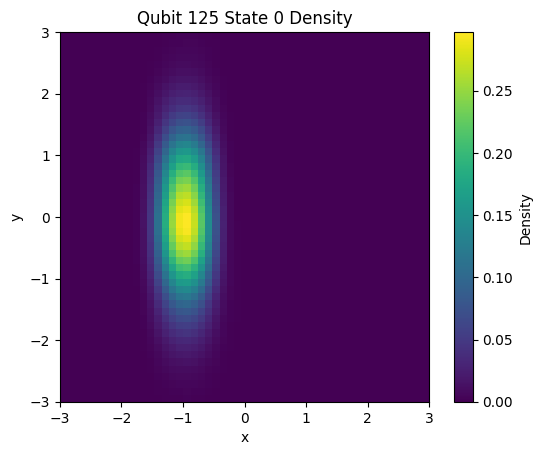

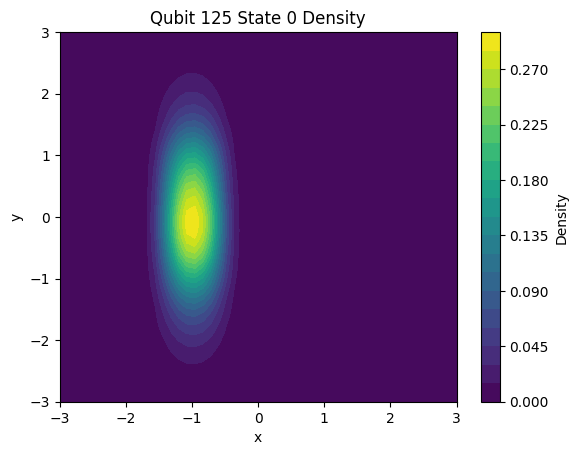

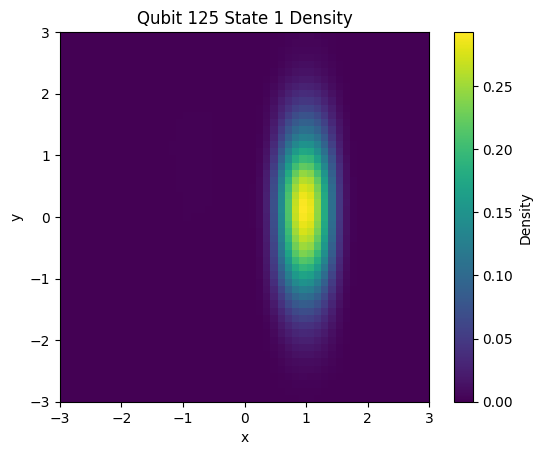

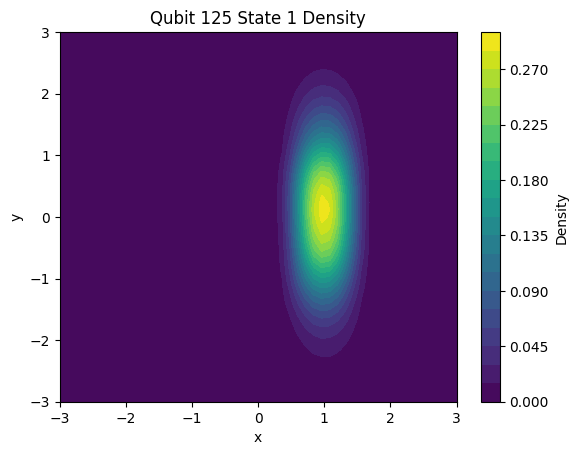

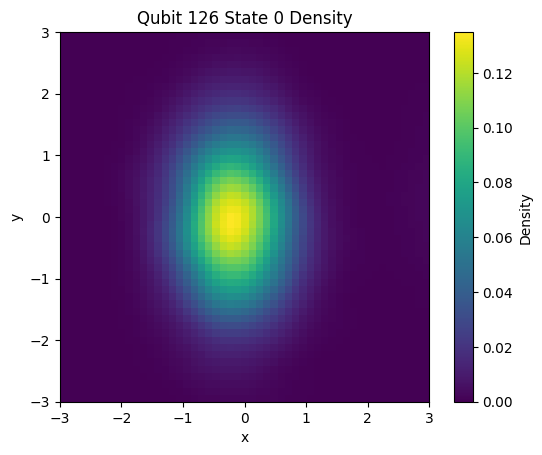

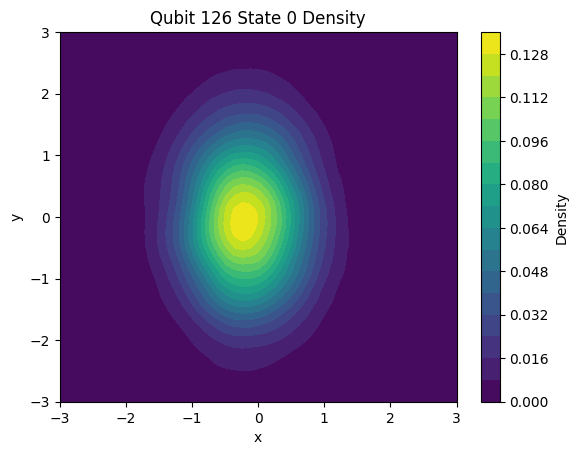

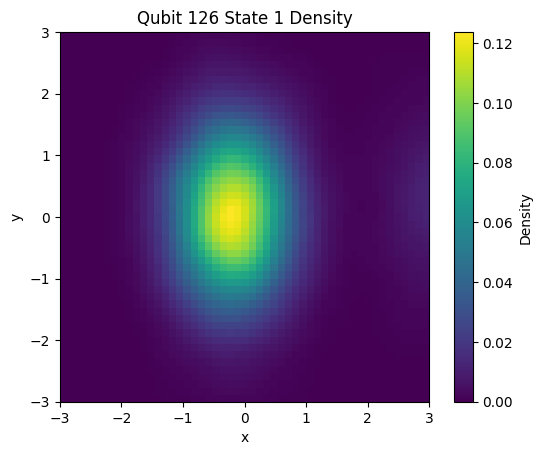

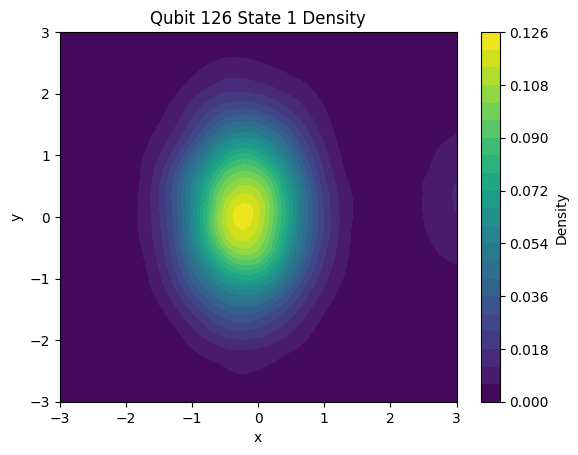

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to reshape and plot density
def plot_density(density, qubit_idx, state):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    plt.imshow(density_reshaped, extent=[-num_std, num_std, -num_std, num_std], origin='lower')
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def plot_density_contour(density, qubit_idx, state, num_points, num_std):
    density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density_reshaped, levels=20, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State {state} Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Loop through each qubit and plot the densities
for qubit_idx, (density_0, density_1) in grid_dict.items():
    if qubit_idx < 125:
        continue
    plot_density(density_0, qubit_idx, state='0')
    plot_density_contour(density_0, qubit_idx, state='0', num_points=num_points, num_std=num_std)
    plot_density(density_1, qubit_idx, state='1')
    plot_density_contour(density_1, qubit_idx, state='1', num_points=num_points, num_std=num_std)


# relError diff plot:

In [41]:
from cpp_soft_info import generate_grid_and_estimate_density

num_points = 51
num_std = 3

kde_dict = get_KDEs(all_memories, bandwiths, relError=0.001, absError=-1)
grid_dict_relErr_1 = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 1.6e-05 seconds
KDE initialization time for qubit 0: 1.958e-06 seconds
KDE evaluation time for qubit 0: 0.278552 seconds
Conversion to Eigen time for qubit 0: 2.5e-06 seconds
KDE initialization time for qubit 1: 2.583e-06 seconds
KDE evaluation time for qubit 1: 0.290794 seconds
Conversion to Eigen time for qubit 1: 2.333e-06 seconds
KDE initialization time for qubit 2: 8.875e-06 seconds
KDE evaluation time for qubit 2: 0.292595 seconds
Conversion to Eigen time for qubit 2: 3.292e-06 seconds
KDE initialization time for qubit 3: 1.6792e-05 seconds
KDE evaluation time for qubit 3: 0.282051 seconds
Conversion to Eigen time for qubit 3: 2.875e-06 seconds
KDE initialization time for qubit 4: 8.25e-06 seconds
KDE evaluation time for qubit 4: 0.291728 seconds
Conversion to Eigen time for qubit 4: 2.958e-06 seconds
KDE initialization time for qubit 5: 9.25e-06 seconds
KDE evaluation time for qubit 5: 0.29569 seconds
Conversion to Eigen time for qubit 5: 3e-06 seconds
KDE 

In [34]:
kde_dict = get_KDEs(all_memories, bandwiths, relError=-1, absError=-1)
grid_dict_relErr_None = generate_grid_and_estimate_density(kde_dict, num_points, num_std)


Grid generation time: 1.6917e-05 seconds
KDE initialization time for qubit 0: 6.708e-06 seconds
KDE evaluation time for qubit 0: 0.197313 seconds
Conversion to Eigen time for qubit 0: 2.375e-06 seconds
KDE initialization time for qubit 1: 9.5e-06 seconds
KDE evaluation time for qubit 1: 0.222262 seconds
Conversion to Eigen time for qubit 1: 6e-06 seconds
KDE initialization time for qubit 2: 9.208e-06 seconds
KDE evaluation time for qubit 2: 0.221933 seconds
Conversion to Eigen time for qubit 2: 2.834e-06 seconds
KDE initialization time for qubit 3: 4.083e-06 seconds
KDE evaluation time for qubit 3: 0.203806 seconds
Conversion to Eigen time for qubit 3: 4.667e-06 seconds
KDE initialization time for qubit 4: 1.0167e-05 seconds
KDE evaluation time for qubit 4: 0.227843 seconds
Conversion to Eigen time for qubit 4: 6.958e-06 seconds
KDE initialization time for qubit 5: 5.291e-06 seconds
KDE evaluation time for qubit 5: 0.228045 seconds
Conversion to Eigen time for qubit 5: 2.917e-06 second

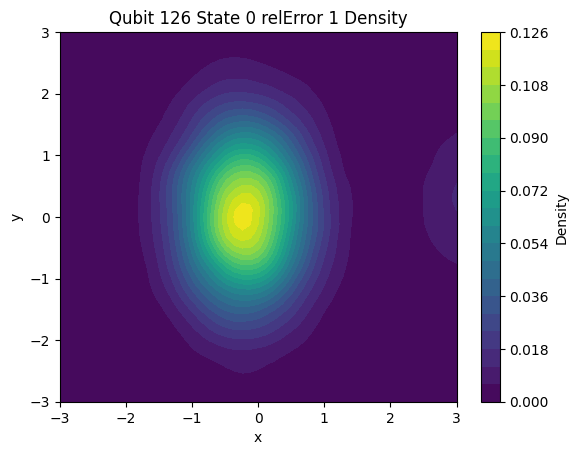

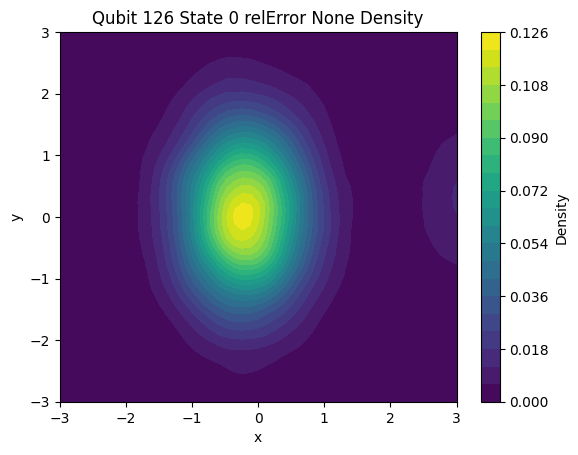

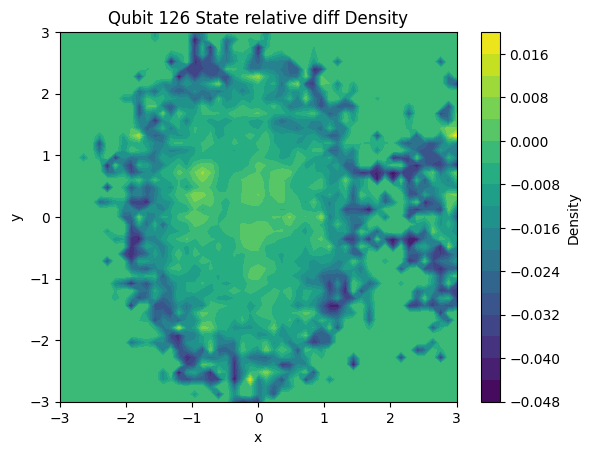

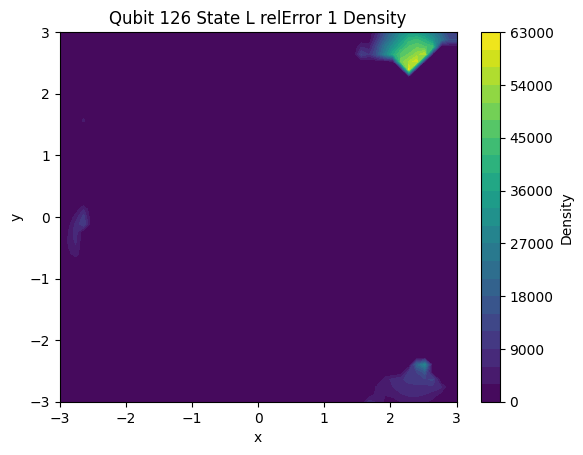

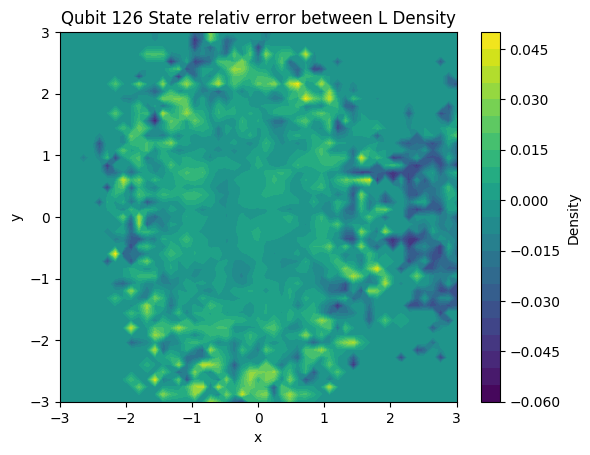

In [47]:
qubit = 126
logical = 1

density_relError_1 = grid_dict_relErr_1[qubit][logical]
density_relError_none = grid_dict_relErr_None[qubit][logical]


L_relErr_1 =[]
for d1, d0 in zip(density_relError_1, density_relError_none):
    L_relErr_1.append(min(d1, d0)/(max(d1, d0)+1e-8))
L_relErr_1 = grid_dict_relErr_1[qubit][1]/(grid_dict_relErr_1[qubit][0]+1e-8)
L_relErr_none = grid_dict_relErr_None[qubit][1]/(grid_dict_relErr_None[qubit][0]+1e-8)




plot_density_contour(density_relError_1, qubit, state='0 relError 1', num_points=num_points, num_std=num_std)
plot_density_contour(density_relError_none, qubit, state='0 relError None', num_points=num_points, num_std=num_std)

plot_density_contour((density_relError_1-density_relError_none)/(density_relError_1/2 + density_relError_none/2+1e-8), qubit, state='relative diff', num_points=num_points, num_std=num_std)
plot_density_contour(L_relErr_1, qubit, state='L relError 1', num_points=num_points, num_std=num_std)
plot_density_contour((L_relErr_1-L_relErr_none)/(L_relErr_1/2+L_relErr_none/2 + 1e-8), qubit, state='relativ error between L', num_points=num_points, num_std=num_std)

# Compare with python

In [13]:
from Scratch import create_or_load_kde_grid

grid = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", other_date="2021-10-30", num_grid_points=num_points, num_std_dev=num_std)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Searching for ibm_sherbrooke and 23.10.27_07h46_51pts_3std
Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.


In [32]:
def plot_density_contour(density, qubit_idx, num_points, num_std):
    # density_reshaped = np.reshape(density, (num_points, num_points)).transpose()
    x = np.linspace(-num_std, num_std, num_points)
    y = np.linspace(-num_std, num_std, num_points)
    X, Y = np.meshgrid(x, y)
    
    plt.contourf(X, Y, density, levels=20, cmap='viridis')  # Use plt.contour for non-filled
    plt.colorbar(label='Density')
    plt.title(f'Qubit {qubit_idx} State 0 Density')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

(51, 51)
(51, 51)


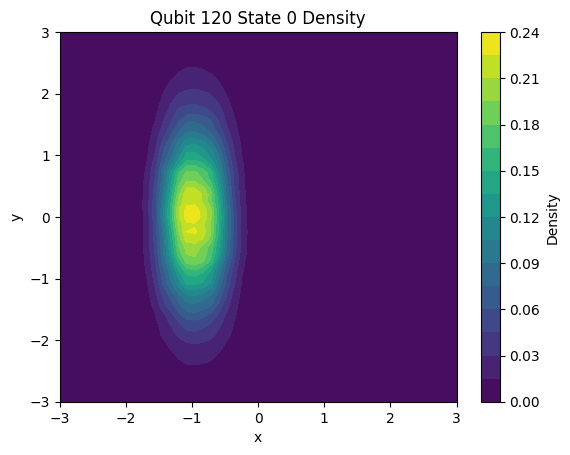

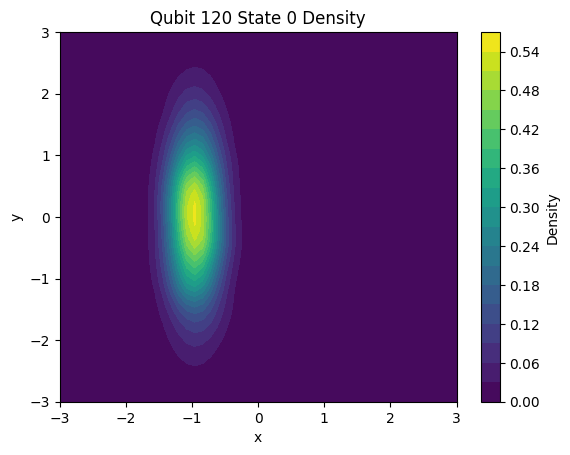

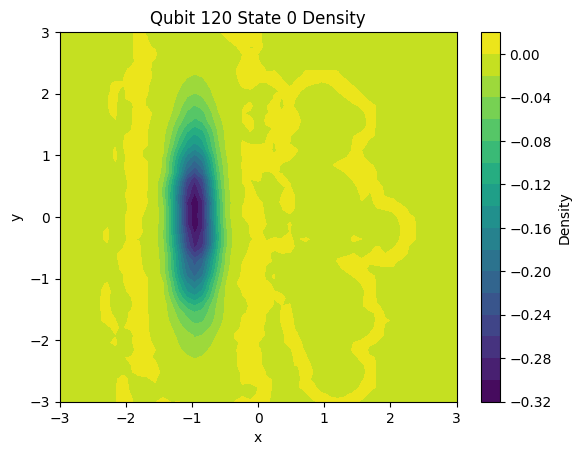

In [36]:
qubit = 120

density_0_py = np.exp(grid[0][qubit].grid_density_0)

density_0_cpp = grid_dict[qubit][0]
density_0_cpp = np.reshape(density_0_cpp, (num_points, num_points)).transpose()

print(density_0_cpp.shape)
print(density_0_py.shape)


density_diff = density_0_cpp - density_0_py

plot_density_contour(density_0_cpp, qubit, num_points=num_points, num_std=num_std)
plot_density_contour(density_0_py, qubit, num_points=num_points, num_std=num_std)
plot_density_contour(density_diff, qubit, num_points=num_points, num_std=num_std)


# Speed with other function

In [6]:
from Scratch import create_or_load_kde_grid


grid_dict_s = create_or_load_kde_grid(provider, tobecalib_backend="ibm_sherbrooke", num_grid_points=num_points, num_std_dev=num_std, other_date='2021-10-30')

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Searching for ibm_sherbrooke and 23.10.27_07h46_50pts_3std
